In [1]:
# ! pip install scikit-learn scipy pandas matplotlib statsmodels fastapi unicorn pydantic pingouin seaborn ipykernel

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot

import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.gofplots import qqplot

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

## 1. Carregar e Visualizar os dados

In [3]:
# Carregar dataset
df_irrigacao = pd.read_csv('./datasets/dados_de_irrigacao.csv')

In [4]:
# Visualizar informações do dataset
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [5]:
# Visualizar topo do dataset
df_irrigacao.head()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


In [6]:
# Visualizar final do dataset
df_irrigacao.tail(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
289,290,29000,19333.333333
290,291,29100,19400.000000
291,292,29200,19466.666667
292,293,29300,19533.333333
293,294,29400,19600.000000
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


## 2. Análise Exploratória dos Dados (EDA):

In [7]:
# Medidas estatísticas das variáveis

df_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

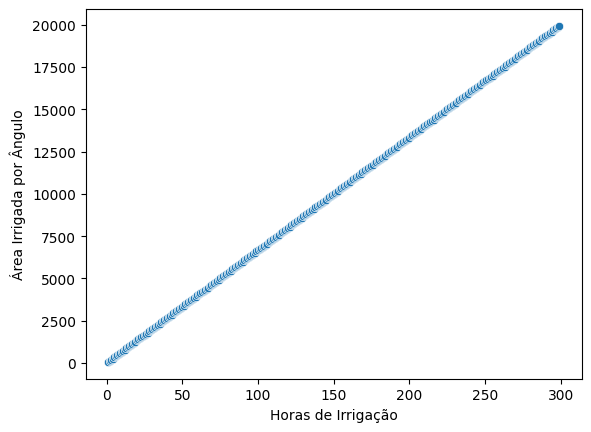

In [8]:
# Dispersão
# X = horas de Irrigação
# Y = Área Irrigada

sns.scatterplot(data=df_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')

<Axes: ylabel='Horas de Irrigação'>

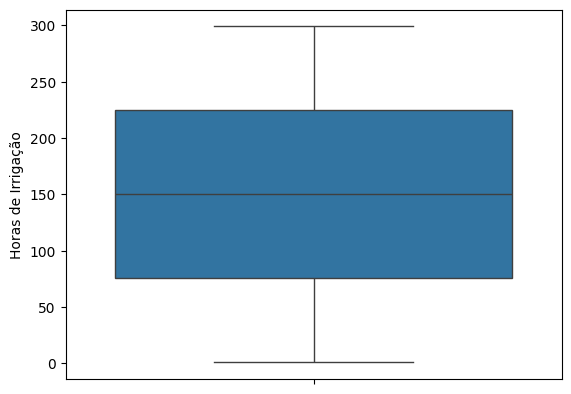

In [9]:
# Verificar se existem outliers
# Plot BoxPlot

sns.boxplot(df_irrigacao, y='Horas de Irrigação')

<Axes: ylabel='Área Irrigada'>

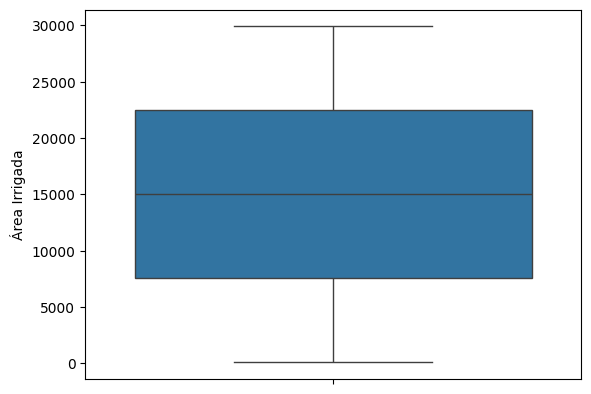

In [10]:
sns.boxplot(df_irrigacao, y='Área Irrigada')

<Axes: ylabel='Área Irrigada por Ângulo'>

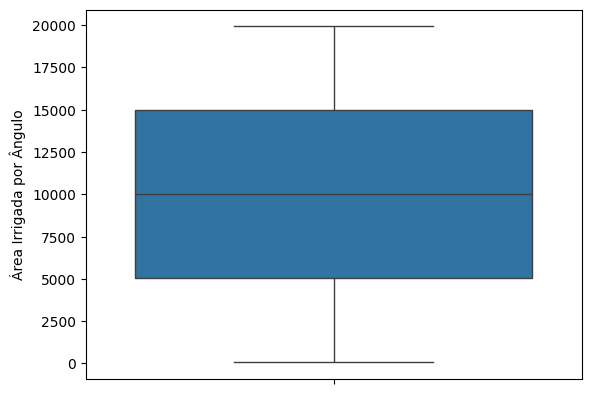

In [11]:
sns.boxplot(df_irrigacao, y='Área Irrigada por Ângulo')

<Axes: >

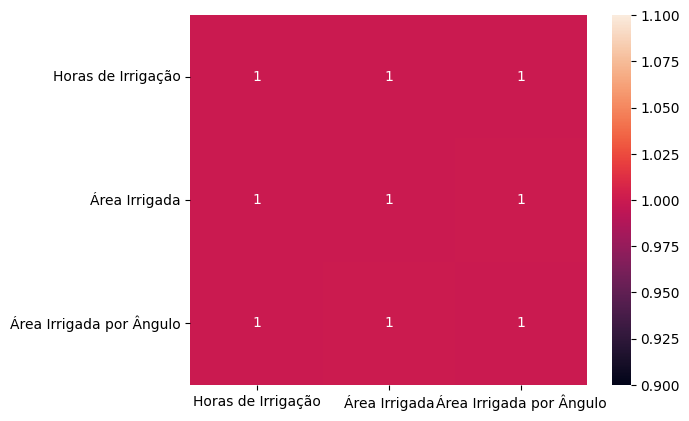

In [12]:
# Verificar Correlação - Pearson 

sns.heatmap(df_irrigacao.corr('pearson'), annot=True)

## 3. Construção do Modelo de Regressão Linear:

#### 3.1 Divisão dos dados em conjuntos de treino e teste.

In [13]:
X = df_irrigacao['Horas de Irrigação'].values.reshape(-1, 1)
y = df_irrigacao['Área Irrigada por Ângulo'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

#### 3.2 Treinar modelo de regressão linear. 

In [14]:
# X -> horas de irrigação;
# Y -> área irrigada por ângulo;

# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

# Treinar o modelo
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 3.3 Equação da reta obtida pelo modelo.

In [15]:
# Equação da reta
# y = aX + b

print("A Equação da reta é y = {:.4f}x + {:.4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A Equação da reta é y = 66.6667x + 0.0000


## 4. Avaliação do Modelo

In [16]:
# Predição dos valores com base no conjunto de testes

y_pred = reg_model.predict(X_test)

#### 4.1 Métricas de desempenho (MSE, MAE)

In [17]:
# MSE
mean_squared_error(y_test, y_pred)

5.0788674199138044e-24

In [18]:
# MAE
mean_absolute_error(y_test, y_pred)

1.8764644159495625e-12

#### 4.2 Gráfico de valores preditos e reais

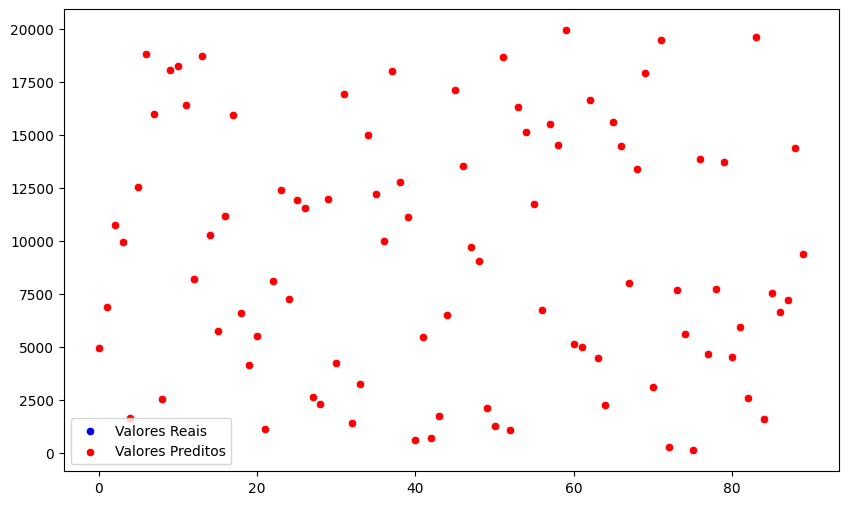

In [19]:
# Analise Gráfica

x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

## 5. Análise de Resíduos

In [20]:
# Calcular residuos
residuos = y_test - y_pred

# Calcualr residuos padronizados
residuos_Std = zscore(residuos)

NameError: name 'zscore' is not defined

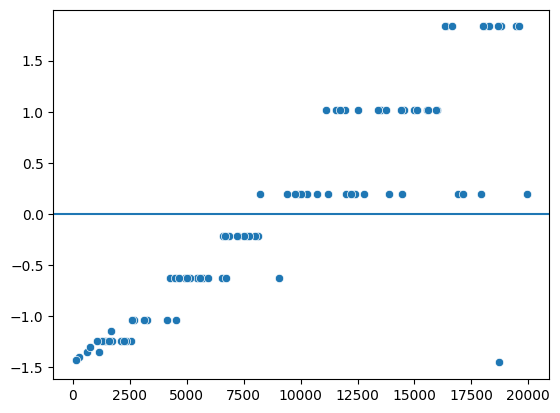

In [ ]:
# Linearidade do modelo:

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_Std.reshape(-1))
plt.axhline(y=0)

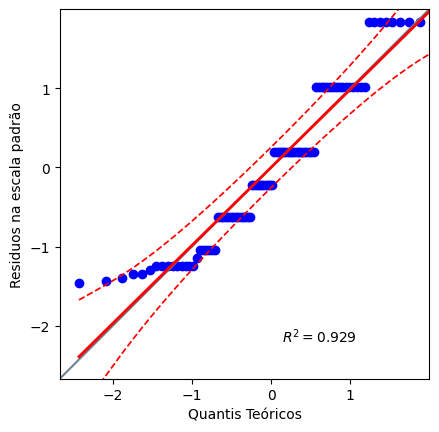

In [ ]:
# Checar se residuos seguem uma distribuição normal

pg.qqplot(residuos_Std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

In [ ]:
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))

print("Estatística do teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.9188782351154261 e P-Valor: 3.150814299065697e-05


In [ ]:
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')

print("Estatística do teste: {} e P-Valor: {}".format(stat_ks, p_valor_ks))

Estatística do teste: 0.49999999999854866 e P-Valor: 2.4869515023142266e-21


## 6. Predições

In [ ]:
hr_exemplo = np.array([[15]])

area_predita = reg_model.predict(hr_exemplo)
print(f"Para 15 horas de irrigação, a área irrigada por ângulo prevista é: {area_predita[0][0]}")

Para 15 horas de irrigação, a área irrigada por ângulo prevista é: 1000.0000000000033
